In [1]:
%load_ext autoreload
%autoreload 2

In [83]:
import pandas as pd
import os
from src.utils import get_project_root_path
import src.config as config
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
ROOT = get_project_root_path()

In [4]:
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', None)

In [5]:
df_singalp6_preds = pd.read_parquet(ROOT + '/data/processed/df_SignalP6_predicted_labels.parquet.gzip')

In [6]:
df_singalp6_preds.head()

,SignalP6_predicted_labels,Kingdom,Type,Partition_No,Sequence,Label,Split
O99019,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,EUKARYA,NO_SP,4,MASISSLNQIPCKTLQITSQYSKPTSKISTLPISSTNFLSKTEQHRSISVKEFTNPKPKFTAQATNYDKE,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,4
P02739,NNHHHHHHHHHHHHCCCCOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,EUKARYA,SP,4,MKLFTGLIFCSLVLGVSSQWYSFIGEAVQGAWDMYRAYSDMREANYKNSDKYFHARGNYDAAQRGPGGAW,SSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,4
P43319,NNNHHHHHHHHHHHHCCCCCOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,NEGATIVE,LIPO,4,MKRAPLITGLLLISTSCAYASSGGCGADSTSGATNYSSVVDDVTVNQTDNVTGREFTSATLSSTNWQYAC,LLLLLLLLLLLLLLLLOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,4
Q8BUN5,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,EUKARYA,NO_SP,4,MSSILPFTPPIVKRLLGWKKGEQNGQEEKWCEKAVKSLVKKLKKTGQLDELEKAITTQNVNTKCITIPRS,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,4
A7MLE5,NNNRRNHHHHHHHHHHHHHHHHHHHHHCCCCCOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,NEGATIVE,TAT,4,MNRRRFIKASLALAAACGTPGLATLFSRNAWAQESDIADGQTRAFDFSVLQAMASELAQKPWGGAPRPLP,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,4


In [7]:
df_singalp6_preds[df_singalp6_preds['SignalP6_predicted_labels'].str.contains('H')].head()

,SignalP6_predicted_labels,Kingdom,Type,Partition_No,Sequence,Label,Split
P02739,NNHHHHHHHHHHHHCCCCOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,EUKARYA,SP,4,MKLFTGLIFCSLVLGVSSQWYSFIGEAVQGAWDMYRAYSDMREANYKNSDKYFHARGNYDAAQRGPGGAW,SSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,4
P43319,NNNHHHHHHHHHHHHCCCCCOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,NEGATIVE,LIPO,4,MKRAPLITGLLLISTSCAYASSGGCGADSTSGATNYSSVVDDVTVNQTDNVTGREFTSATLSSTNWQYAC,LLLLLLLLLLLLLLLLOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,4
A7MLE5,NNNRRNHHHHHHHHHHHHHHHHHHHHHCCCCCOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,NEGATIVE,TAT,4,MNRRRFIKASLALAAACGTPGLATLFSRNAWAQESDIADGQTRAFDFSVLQAMASELAQKPWGGAPRPLP,TTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTTOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,4
B1B5I8,NNNHHHHHHHHHHHHHCCCOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,EUKARYA,SP,4,MAKLYFLLCLALVACLTMATEEMPALCHLQPDVPKCRGYFPRYYYNPEVGKCEQFIYGGCGGNKNNFVSF,SSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,4
P07994,NNHHHHHHHHHCCCCCCOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,EUKARYA,SP,4,MWLQLLLLLLAPQGGHGCHGLELDRELVLAKVRALFLDALGPPPVTGEGGDPGVRRLHRRHAVGGFMRRG,SSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,4


In [8]:
# unique_chars = set(''.join(df_spgpt_preds['predicted_label_linear_experts_imperfect']))
# unique_chars

In [9]:
sp6_to_binary = {
    'C': 'S',
    'H': 'S',
    'N': 'S',
    'R': 'S',
    'O': 'O',
}

spgpt_to_binary = {
    'S': 'S',
    'T': 'S',
    'L': 'S',
    'I': 'O',
    'M': 'O',
    'O': 'O',
}

In [10]:
bin_singalp6 = pd.DataFrame(df_singalp6_preds['SignalP6_predicted_labels'].apply(lambda x: ''.join([sp6_to_binary[c] for c in x])))

---

In [11]:
df_spgpt_preds = pd.read_parquet('./results/df_data.parquet.gzip')

In [12]:
display(df_spgpt_preds.head(1), df_spgpt_preds.shape)

,Uniprot_AC,Kingdom,Type,Partition_No,Sequence,Label,Sequence_Raw,input_ids,ds_attention_mask,ds_labels,ds_type,predicted_type,predicted_label_linear_ALL,predicted_label_linear_experts,predicted_label_crf_ALL,predicted_label_crf_experts,predicted_label_linear_experts_imperfect_viterbi,predicted_label_crf_experts_imperfect,predicted_label_linear_experts_imperfect
0,P55317,EUKARYA,NO_SP,4,M L G T V K M E G H E T S D W N S Y Y A D T Q E A Y S S V P V S N M N S G L G S M N S M N T Y M T M N T M T T S G N M T P A S F N M S Y A N,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,MLGTVKMEGHETSDWNSYYADTQEAYSSVPVSNMNSGLGSMNSMNTYMTMNTMTTSGNMTPASFNMSYAN,"[19, 4, 5, 11, 6, 14, 19, 9, 5, 20, 9, 11, 7, 10, 21, 17, 7, 18, 18, 3, 10, 11, 16, 9, 3, 18, 7, 7, 6, 13, 6, 7, 17, 19, 17, 7, 5, 4, 5, 7, 19, 17, 7, 19, 17, 11, 18, 19, 11, 19, 17, 11, 19, 11, 11, 7, 5, 17, 19, 11, 13, 3, 7, 15, 17, 19, 7, 18, 3, 17, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0,NO_SP,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII,IIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIIII


(4147, 19)

In [13]:
df_spgpt_preds.set_index('Uniprot_AC', inplace=True)

In [14]:
bin_spgpt = pd.DataFrame(
    df_spgpt_preds['predicted_label_linear_experts_imperfect'].apply(lambda x: ''.join([spgpt_to_binary[c] for c in x]))
    )

In [15]:
display(bin_singalp6.head(), bin_spgpt.head())
display(bin_singalp6.shape, bin_spgpt.shape)

,SignalP6_predicted_labels
O99019,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
P02739,SSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
P43319,SSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
Q8BUN5,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
A7MLE5,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


,predicted_label_linear_experts_imperfect
Uniprot_AC,
P55317,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
P35583,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
Q8UVD9,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
Q99PF5,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
Q9URU9,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


(4147, 1)

(4147, 1)

In [16]:
joined_df = bin_singalp6.join(bin_spgpt)
joined_df = joined_df.join(df_spgpt_preds['Label'].apply(lambda x: ''.join([spgpt_to_binary[c] for c in x])))

In [17]:
joined_df.head(), joined_df.shape

(                                                     SignalP6_predicted_labels  \
 O99019  OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO   
 P02739  SSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO   
 P43319  SSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO   
 Q8BUN5  OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO   
 A7MLE5  SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO   
 
                                       predicted_label_linear_experts_imperfect  \
 O99019  OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO   
 P02739  SSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO   
 P43319  SSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO   
 Q8BUN5  OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO   
 A7MLE5  SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO   
 


In [20]:
joined_df['predicted_label_linear_experts_imperfect'].isna().sum()

0

In [21]:
joined_df.rename(columns={'SignalP6_predicted_labels': 'SignalP6', 'predicted_label_linear_experts_imperfect': 'CRF Experts Imperfect Gate', 'Label': 'Truth'}, inplace=True)

In [22]:
joined_df.head()

,SignalP6,CRF Experts Imperfect Gate,Truth
O99019,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
P02739,SSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,SSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,SSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
P43319,SSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,SSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,SSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
Q8BUN5,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
A7MLE5,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO,SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO


In [23]:
# accuracy_score
joined_df['SignalP6 Accuracy'] = joined_df.apply(lambda x: accuracy_score(y_pred=list(x['SignalP6']), y_true=list(x['Truth'])), axis=1)
joined_df['CRF Experts Imperfect Gate Accuracy'] = joined_df.apply(lambda x: accuracy_score(y_pred=list(x['CRF Experts Imperfect Gate']), y_true=list(x['Truth'])), axis=1)

In [76]:
def custom_mcc_score(y_true, y_pred):
    if y_true[0] == y_pred[0] and len(set(y_true)) == 1 and len(set(y_pred)) == 1:
        return 1.0
    return matthews_corrcoef(y_true, y_pred)

In [77]:
custom_mcc_score(
    ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S'],
    ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S']
)

1.0

In [104]:
long_truth = list(''.join(joined_df['Truth'].tolist()))
long_sp6 = list(''.join(joined_df['SignalP6'].tolist()))
long_spgpt = list(''.join(joined_df['CRF Experts Imperfect Gate'].tolist()))
mcc_long_sp6 = matthews_corrcoef(y_true=long_truth, y_pred=long_sp6)
mcc_long_spgpt = matthews_corrcoef(y_true=long_truth, y_pred=long_spgpt)


/var/folders/c3/ctxqsv450b3cgzj3sklngdm80000gn/T/ipykernel_51910/924090627.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(['SignalP6', 'CRF Experts Imperfect Gate'], [mcc_long_sp6, mcc_long_spgpt], yerr=[signalp6_errors, spgpt_errors], fmt='.k', color='black', elinewidth=5,)


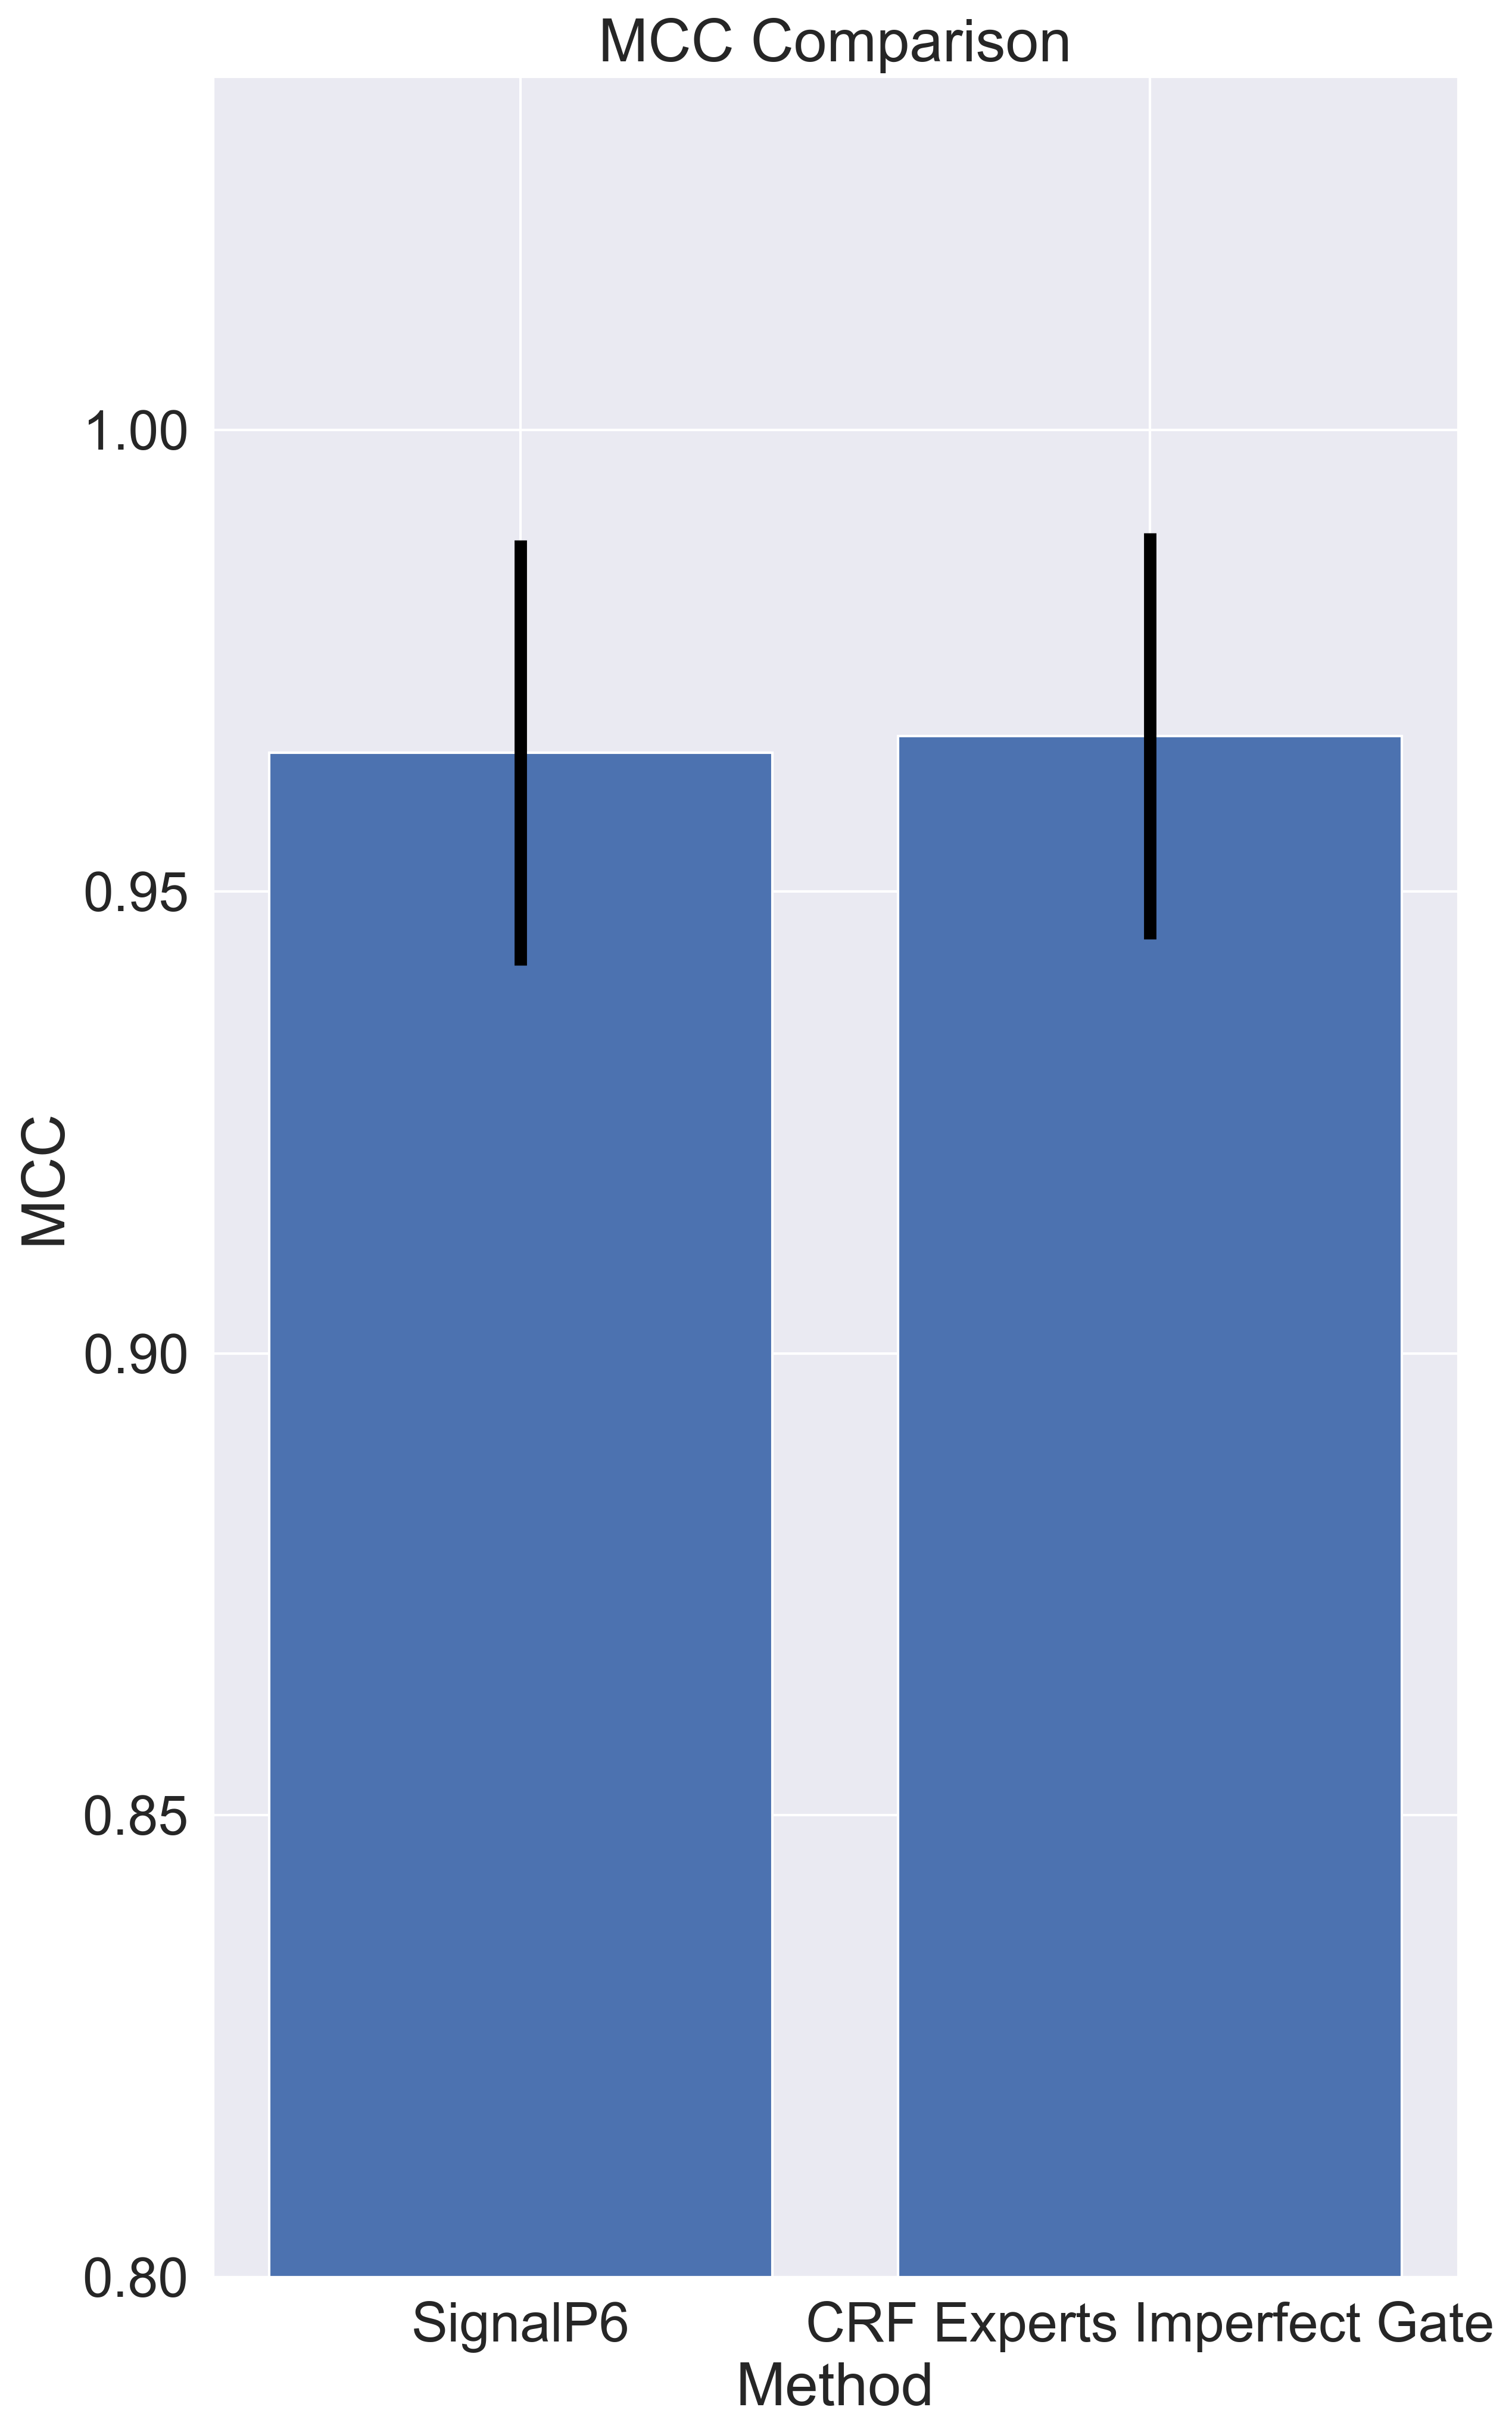

In [124]:
# Calculate the errors
signalp6_errors = 0.023
spgpt_errors = 0.022

# Plot the barplot with errors
sns.set(font_scale=2)
plt.bar(['SignalP6', 'CRF Experts Imperfect Gate'], [mcc_long_sp6, mcc_long_spgpt])
plt.errorbar(['SignalP6', 'CRF Experts Imperfect Gate'], [mcc_long_sp6, mcc_long_spgpt], yerr=[signalp6_errors, spgpt_errors], fmt='.k', color='black', elinewidth=5,)
plt.xlabel('Method')
plt.ylabel('MCC')
plt.title('MCC Comparison')
plt.ylim(0.8, plt.ylim()[1])
plt.yticks(np.arange(0.8, plt.ylim()[1], 0.05))
sns.set(rc={"figure.dpi": 300, 'savefig.dpi': 300})
sns.set(rc={'figure.figsize': (9, 16)})


In [93]:
# matthews_corrcoef
joined_df['SignalP6 MCC'] = joined_df.apply(lambda x: matthews_corrcoef(y_pred=list(x['SignalP6']), y_true=list(x['Truth'])), axis=1)
joined_df['CRF Experts Imperfect Gate MCC'] = joined_df.apply(lambda x: matthews_corrcoef(y_pred=list(x['CRF Experts Imperfect Gate']), y_true=list(x['Truth'])), axis=1)

In [94]:
# joined_df.head(200)

In [95]:
joined_df['SignalP6 MCC'].mean()

0.2464472411662762

In [96]:
# joined_df['CRF Experts Imperfect Gate Accuracy'].mean()
# sns.histplot(data=joined_df, x='CRF Experts Imperfect Gate Accuracy')

In [97]:
# sns.boxplot(data=joined_df[['CRF Experts Imperfect Gate MCC', 'SignalP6 MCC']], showmeans=True, meanprops={"marker":"o","markerfacecolor":"white", "markeredgecolor":"black"}, showfliers=False)

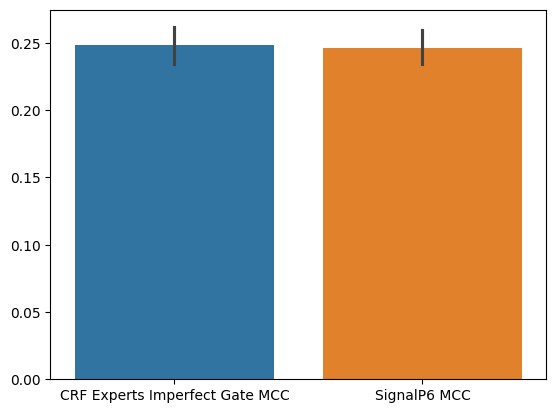

In [99]:
barplot = sns.barplot(data=joined_df[['CRF Experts Imperfect Gate MCC', 'SignalP6 MCC']])
# barplot.set(ylim=(0.97, 1.0))
# barplot.set_yticks(np.arange(0.97, barplot.get_ylim()[1], 0.01))

In [103]:
barplot.errorbar

<bound method Axes.errorbar of <Axes: >>

In [101]:
crf_errors = np.std(joined_df['CRF Experts Imperfect Gate MCC'])
crf_errors

0.4281627066561062

In [ ]:
# Calculate the errors
signalp6_errors = np.std(joined_df['SignalP6 MCC'])
crf_errors = np.std(joined_df['CRF Experts Imperfect Gate MCC'])

# Plot the barplot with errors
plt.bar(['SignalP6', 'CRF Experts Imperfect Gate'], [joined_df['SignalP6 MCC'].mean(), joined_df['CRF Experts Imperfect Gate MCC'].mean()])
plt.errorbar(['SignalP6', 'CRF Experts Imperfect Gate'], [joined_df['SignalP6 MCC'].mean(), joined_df['CRF Experts Imperfect Gate MCC'].mean()], yerr=[signalp6_errors, crf_errors], fmt='o', color='red')
plt.xlabel('Method')
plt.ylabel('MCC')
plt.title('MCC Comparison')
plt.show()


In [35]:
joined_df[['CRF Experts Imperfect Gate Accuracy']].value_counts()


CRF Experts Imperfect Gate Accuracy
1.000000                               3924
0.985714                                 76
0.971429                                 36
0.957143                                 19
0.942857                                 14
0.928571                                 12
0.914286                                  8
0.885714                                  8
0.871429                                  5
0.742857                                  5
0.842857                                  3
0.671429                                  3
0.528571                                  3
0.628571                                  2
0.457143                                  2
0.542857                                  2
0.900000                                  2
0.557143                                  2
0.857143                                  2
0.614286                                  2
0.728571                                  2
0.685714                                

In [ ]:
# df_singalp6_preds_type_split = df_singalp6_preds[
#     df_singalp6_preds['Type'] == 'SP'
# ]

# pd.DataFrame(df_singalp6_preds_type_split[['SignalP6_predicted_labels', 'Label']].value_counts())

# df_singalp6_preds_type_split[
#     df_singalp6_preds_type_split['SignalP6_predicted_labels'] == 'NNHHHHHHHHHHHHCCCCOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO'
# ]

# pd.DataFrame([x for x in ''.join(df_singalp6_preds_type_split['SignalP6_predicted_labels'].values.tolist())]).value_counts()